In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (8,6)

In [3]:
num_dimensions = 2
num_samples = 1000
outlier_ratio = 0.01
num_inliers = int(num_samples * (1-outlier_ratio))
num_outliers = num_samples - num_inliers

In [4]:
num_inliers

990

In [5]:
num_outliers

10

In [7]:
# Samples generation
x_0 = np.random.randn(num_inliers//3, num_dimensions)
x_1 = np.random.randn(num_inliers//3, num_dimensions) - 7
x_2 = np.random.randn(num_inliers//3, num_dimensions) + 7
x_rand = np.random.uniform(low=-10, high=10, size=(num_outliers, num_dimensions))
x_rand

array([[ 1.37625621,  0.93899905],
       [-5.65064629,  8.63500584],
       [-0.87086058,  6.86453437],
       [-6.23832607, -5.08611705],
       [-9.86293175, -6.38156699],
       [ 7.05610692, -3.35421896],
       [-6.98973955, -6.84584998],
       [ 7.80084378, -9.07426558],
       [ 8.29779148, -1.05230631],
       [-4.36035072,  1.12631381]])

In [8]:
# Add outliers sampled from a random uniform distribution
x = np.r_[x_0, x_1, x_2, x_rand]

# print the three fist elements
x[:3]

array([[-1.33486064, -0.3709678 ],
       [ 1.09228502, -0.32329256],
       [-0.47158548, -2.73602807]])

In [12]:
# Generate labels, 1 for inliers and -1 for outliers
labels = np.ones(num_samples, dtype=int)
labels[-num_outliers:] = -1
labels[-5:]

array([-1, -1, -1, -1, -1])

# Applying sklearn.svm.OneClassSVM for Anatomy Dtection

In [29]:
from sklearn import svm

classifier = svm.OneClassSVM(nu=0.99 * outlier_ratio + 0.01, kernel="rbf", gamma=0.1)
classifier.fit(x)
y_pred = classifier.predict(x)
num_errors = sum(y_pred != labels)
score = (sum(y_pred == labels)/num_samples)*100
print('Number of errors: {}'.format(num_errors), '; Accuracy of the model: {}'.format(score))

Number of errors: 13 ; Accuracy of the model: 98.7


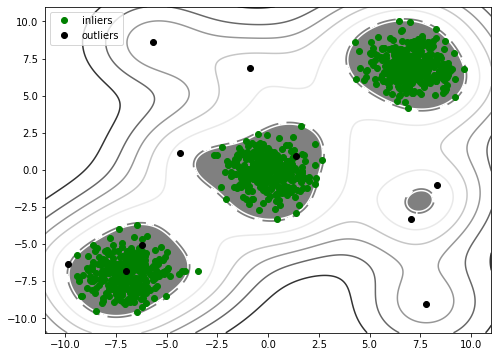

In [24]:
scores_pred = classifier.decision_function(x)
threshold = stats.scoreatpercentile(scores_pred, 100 * outlier_ratio)
xx, yy = np.meshgrid(np.linspace(-11,11,1000), np.linspace(-11,11,1000))
Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

inlier_plot = plt.plot(x[:num_inliers,0], x[:num_inliers,1], 'go', label='inliers')
outlier_plot = plt.plot(x[-num_outliers:,0], x[-num_outliers:,1], 'ko', label='outliers')

plt.contour(xx, yy, Z, levels=[threshold],linewidths=5, colors='gray')
plt.contour(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7), cmap=plt.cm.Greys_r)
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()], colors='gray')

plt.xlim(-11,11)
plt.ylim(-11,11)
plt.legend(numpoints=1)
plt.show()

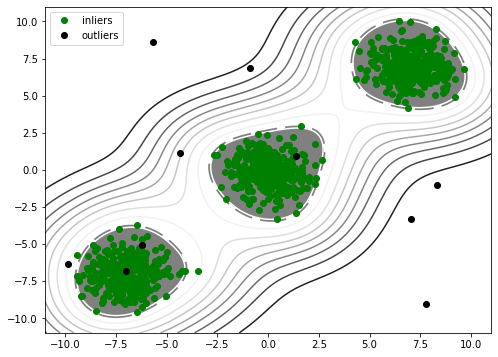

In [25]:
x = np.r_[x_0, x_1, x_2]
classifier = svm.OneClassSVM(nu=0.99 * outlier_ratio + 0.01, kernel="rbf", gamma=0.1)
classifier.fit(x)
scores_pred = classifier.decision_function(x)
threshold = stats.scoreatpercentile(scores_pred, 100 * outlier_ratio)
xx, yy = np.meshgrid(np.linspace(-11,11,1000), np.linspace(-11,11,1000))
Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

x = np.r_[x, x_rand]

inlier_plot = plt.plot(x[:num_inliers,0], x[:num_inliers,1], 'go', label='inliers')
outlier_plot = plt.plot(x[-num_outliers:,0], x[-num_outliers:,1], 'ko', label='outliers')

plt.contour(xx, yy, Z, levels=[threshold],linewidths=5, colors='gray')
plt.contour(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 10), cmap=plt.cm.Greys_r)
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()], colors='gray')
plt.xlim(-11,11)
plt.ylim(-11,11)

plt.legend(numpoints=1)
plt.show()

In [61]:
from sympy import *
x, y, z = symbols('x y z', real=True)

In [62]:
f = z*exp(3*x - 7*y)

In [63]:
d_fx = f.diff(x)
d_fx

3*z*exp(3*x - 7*y)

In [65]:
d_fy = f.diff(y)
d_fy

-7*z*exp(3*x - 7*y)

In [67]:
d_fz = f.diff(z)
d_fz

exp(3*x - 7*y)

In [89]:
latex([f.diff(x) for x in (x, y, z)]) # gradient 

'\\left[ 3 z e^{3 x - 7 y}, \\  - 7 z e^{3 x - 7 y}, \\  e^{3 x - 7 y}\\right]'

$\left[ 3 z e^{3 x - 7 y}, \\  - 7 z e^{3 x - 7 y}, \\  e^{3 x - 7 y}\right]$

In [84]:
[[f.diff(x).diff(y) for x in (x, y, z)] for y in (x, y, z)] # Hessian

[[9*z*exp(3*x - 7*y), 9*z*exp(3*x - 7*y), 3*exp(3*x - 7*y)],
 [-21*z*exp(3*x - 7*y), 49*z*exp(3*x - 7*y), -7*exp(3*x - 7*y)],
 [3*exp(3*x - 7*y), 0, 0]]

$\left[ \left[ 9 z e^{3 x - 7 y},  9 z e^{3 x - 7 y},  3 e^{3 x - 7 y}\right], \\  \left[ - 21 z e^{3 x - 7 y},  49 z e^{3 x - 7 y}, - 7 e^{3 x - 7 y}\right], \\  \left[ 3 e^{3 x - 7 y},  0,  0\right] \right]$